In [2]:
# Evaluating Model Parameters
%pip install numpy pandas scikit-learn matplotlib

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 11.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.1 MB 11.9 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 11.9 MB/s eta 0:00:01
   ----------------------------------- ---- 9.7/11.1 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 10.9 MB/s eta 0:00:00
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   -- ------------------------------------- 2.4/41.0 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/41.0 MB 11.9 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/41.0 MB 11.8 MB/s eta 0:00:03
   --------- ------------------------------ 9.4/41.0 MB 11.6 MB/s eta 0:00:03
   ---------- ----------------------------


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Here’s our data
sizes = np.array([1000, 1500, 2000, 2500]).reshape(-1, 1)
prices = np.array([150, 200, 250, 300])

# Make it a neat table
data = pd.DataFrame({'Size': sizes.flatten(), 'Price': prices})
print("Our starting point:")
print(data)

Our starting point:
   Size  Price
0  1000    150
1  1500    200
2  2000    250
3  2500    300


In [4]:
# Create the model
model = LinearRegression()

# Fit it to our data
model.fit(sizes, prices)

# Pull out the intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.3f}")

Intercept: 50.00
Slope: 0.100


In [5]:
# Make predictions
predicted_prices = model.predict(sizes)

# Add them to our table
data['Predicted Price'] = predicted_prices
print("\nHow we did:")
print(data)

# See the misses
residuals = prices - predicted_prices
print("\nThe differences:")
print(residuals)


How we did:
   Size  Price  Predicted Price
0  1000    150            150.0
1  1500    200            200.0
2  2000    250            250.0
3  2500    300            300.0

The differences:
[ 0.00000000e+00 -2.84217094e-14  0.00000000e+00  0.00000000e+00]


In [6]:
# How much of the pattern we caught
r_squared = model.score(sizes, prices)

# How big our mistakes are
mse = mean_squared_error(prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 1.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.00


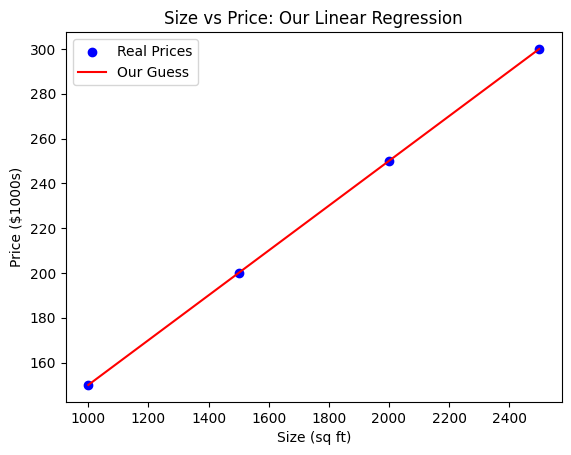

In [7]:
# Plot the real points
plt.scatter(sizes, prices, color='blue', label='Real Prices')

# Draw our line
plt.plot(sizes, predicted_prices, color='red', label='Our Guess')

# Make it pretty
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('Size vs Price: Our Linear Regression')
plt.legend()
plt.show()